(-0.5, 339.5, 269.5, -0.5)

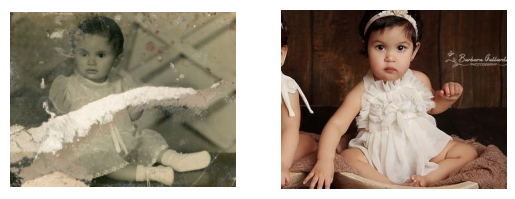

In [28]:
from PIL import Image
import torch
from similarity_net import SimilarityNet
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


# Initialize the model
att_model = SimilarityNet(out_channels=3)

img = Image.open('../data/img/1.png')
ref = Image.open('../data/ref/1.jpg')

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(ref)
plt.axis('off')

In [29]:
transf = transforms.Compose([transforms.Resize((256,256)), transforms.ToTensor()])

tensor_img = transf(img).unsqueeze(0)
tensor_ref = transf(ref).unsqueeze(0)
inputte = torch.cat((tensor_img, tensor_ref))
print(inputte[0].shape)

out = att_model(inputte)
print("OUT: ", [out[i].shape for i in range(4)])

torch.Size([3, 256, 256])
Resnet out shape:  [torch.Size([64, 64, 64]), torch.Size([128, 32, 32]), torch.Size([256, 16, 16]), torch.Size([512, 8, 8])]
Resnet out shape:  [torch.Size([64, 64, 64]), torch.Size([128, 32, 32]), torch.Size([256, 16, 16]), torch.Size([512, 8, 8])]
Conv out shape:  [torch.Size([3, 64, 64]), torch.Size([3, 32, 32]), torch.Size([3, 16, 16]), torch.Size([3, 8, 8])]
Conv out shape:  [torch.Size([3, 64, 64]), torch.Size([3, 32, 32]), torch.Size([3, 16, 16]), torch.Size([3, 8, 8])]
M shapes:  [torch.Size([4, 3, 64, 64]), torch.Size([4, 3, 32, 32]), torch.Size([4, 3, 16, 16]), torch.Size([4, 3, 8, 8])]
M shapes:  [torch.Size([4, 3, 64, 64]), torch.Size([4, 3, 32, 32]), torch.Size([4, 3, 16, 16]), torch.Size([4, 3, 8, 8])]
OUT:  [torch.Size([4, 3, 64, 64]), torch.Size([4, 3, 32, 32]), torch.Size([4, 3, 16, 16]), torch.Size([4, 3, 8, 8])]


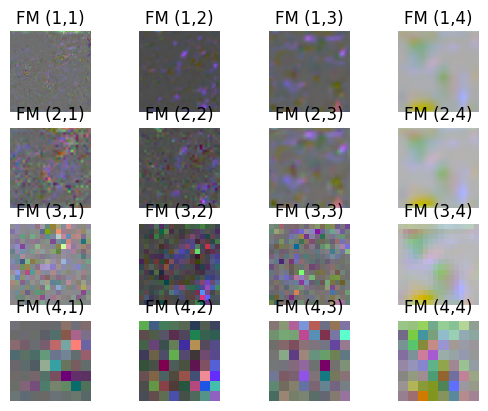

In [30]:
for i in range(4):
    for j in range(1,5):
        plt.subplot(4,4,(4*i)+j)
        plt.title(f"FM ({i+1},{j})")
        image = out[i][j-1]
        normalized_image = (image - torch.min(image)) / (torch.max(image) - torch.min(image))
        plt.imshow(normalized_image.detach().numpy().transpose(2,1,0))
        plt.axis('off')